# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [11]:
!pip install pandas

import pandas as pd
from google.colab import files      #here I'm uploading the dataset from my computer
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

print(df.head())

Saving data.csv to data.csv
   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask 

# 2.&nbsp;Data Cleaning (overview)

In [21]:
df.head()  # Display first few rows
df.info()  # Get basic info on columns
df.describe()  # Statistical summary of numerical columns
df.isnull().sum() # Check for missing values

#research question: what variables are the predictors of the energy of a song?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

'\nDescriptive Statistics: Calculate summary statistics (mean, median, variance) for each song attribute across different\nartists. This will give you an idea of how the attributes vary between artists.\nVisualizations:\nBox plots or violin plots of each song attribute grouped by artist.\nYou can use ANOVA (Analysis of Variance) to test whether the mean values of certain attributes differ significantly between artists.\nIf you want to compare specific artists (e.g., Artist A vs. Artist B), you could use t-tests for comparing means of song attributes between artists.\n'

# 4.&nbsp;Data Cleaning (reduction)

In [ ]:
# Here I removed the unnecessary columns
df.drop(['song_title', 'artist', 'target'], axis=1, inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 220.7 KB


# 8.&nbsp;Data Analysis

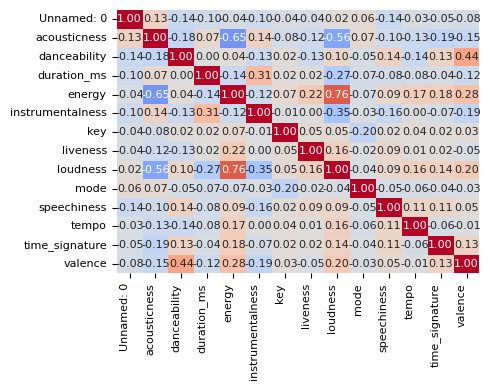

energy              1.000000
loudness            0.762177
valence             0.278383
liveness            0.217435
time_signature      0.182895
tempo               0.165721
speechiness         0.093102
key                 0.072886
danceability        0.038557
Unnamed: 0         -0.039880
mode               -0.070263
instrumentalness   -0.122890
duration_ms        -0.144473
acousticness       -0.646319
Name: energy, dtype: float64


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, annot_kws={"size": 8}, fmt=".2f")
plt.xticks(fontsize=8, ha="right")
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Check correlation of energy specifically
print(corr_matrix['energy'].sort_values(ascending=False))

In [72]:
# to better understand the dynamics between energy, loudness and acousticness I perform a linear regression
import pandas as pd
import statsmodels.api as sm

# Define the independent variables and add a constant term for the intercept
X = df[['loudness', 'acousticness']]
X = sm.add_constant(X)  # Adds a constant term to the predictors

# Define the dependent variable
y = df['energy']

# Fit the linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1873.
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                 1343.5
No. Observations:                2017   AIC:                            -2681.
Df Residuals:                    2014   BIC:                            -2664.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9609      0.006    159.742   

'\'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\n\nX = df[[\'loudness\', \'acousticness\']] \ny = df[\'energy\']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #The dataset is split into training and testing sets.\n\n#Creating and Fitting the Model:\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\ny_pred = model.predict(X_test)\nprint("Mean Squared Error:", mean_squared_error(y_test, y_pred))\nprint("R-squared:", r2_score(y_test, y_pred))\nprint("Model Coefficients:", model.coef_)\n'

# 9.&nbsp;Data Visualization

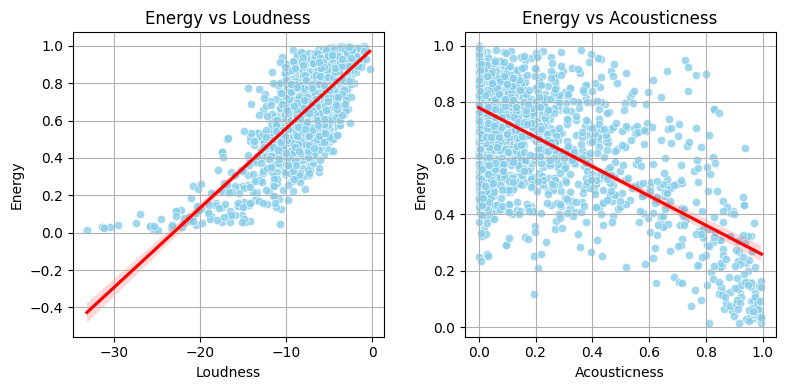

In [66]:
#Now I want to plot the effects of both variables with a scatterplot to better visualize them.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=df, x='loudness', y='energy', color='skyblue', alpha=0.8)
sns.regplot(data=df, x='loudness', y='energy', scatter=False, color='red')
plt.title('Energy vs Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.grid(True)


# Scatter plot for Energy vs Acousticness
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data=df, x='acousticness', y='energy', color='skyblue', alpha=0.8)
sns.regplot(data=df, x='acousticness', y='energy', scatter=False, color='red')
plt.title('Energy vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.grid(True)

# Adjust layout to add space between plots
plt.subplots_adjust(wspace=12800)  # Increase the space between subplots

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# 10.&nbsp;Data Exporting

In [ ]:
!pip install PyGithub
from github import Github

# Your GitHub Personal Access Token
token = 'YOUR_PERSONAL_ACCESS_TOKEN'  # Replace with your GitHub token

# Your repository details
repo_name = 'YOUR_USERNAME/YOUR_REPO_NAME'  # Replace with your repo name (e.g., 'myusername/myrepo')
file_path = '/content/your_notebook.ipynb'  # Path to your notebook in Colab
commit_message = 'Add Google Colab notebook'  # Commit message

# Load your notebook
with open(file_path, 'r') as file:
    content = file.read()

# Authenticate to GitHub
g = Github(token)

# Get the repository
repo = g.get_repo(repo_name)

# Upload the notebook
repo.create_file("your_notebook.ipynb", commit_message, content)
print("Notebook uploaded successfully!")

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
[master (root-commit) 42c98ce] Initial commit
 22 files changed, 53012 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gc